# 차원 축소
## 1. Manifold Learning

- 비지도학습 알고리즘(PCA와 차별성은 원자료가 비선형형태인 경우)
- 데이터 세트를 고차원 공간에 포함된 저차원 매니폴드(manifold)로 설명하려는 비지도학습 알고리즘
    * 3차원 공간에서 휘어진 2차원의 A4 종이
- 3차원 공간에서 종이 조각을 회전, 방향 변경 또는 늘려도 여전히 2차원임(선형변환과 유사)
    * 종이를 구부거나, 말거나, 구겨도 여전히 2차원 manifold 이지만 3차원 공간으로 임베딩은 비선형
    
#### 매니 폴드 학습 알고리즘은 3 차원 공간에서 비선형으로 왜곡 된 경우라도 A4 종이의 근본적인 2 차원 특성에 대해 학습

In [1]:
from IPython.display import Image
width=700; height=500

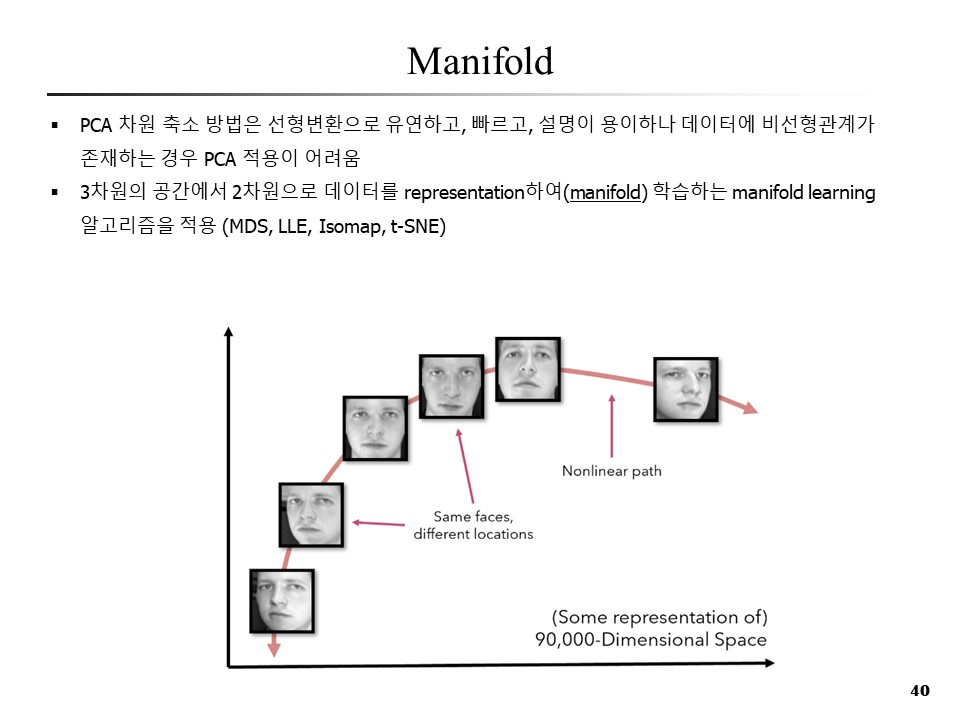

In [2]:
Image(filename='../image/pca/슬라이드40.jpg', width=width, height=height)

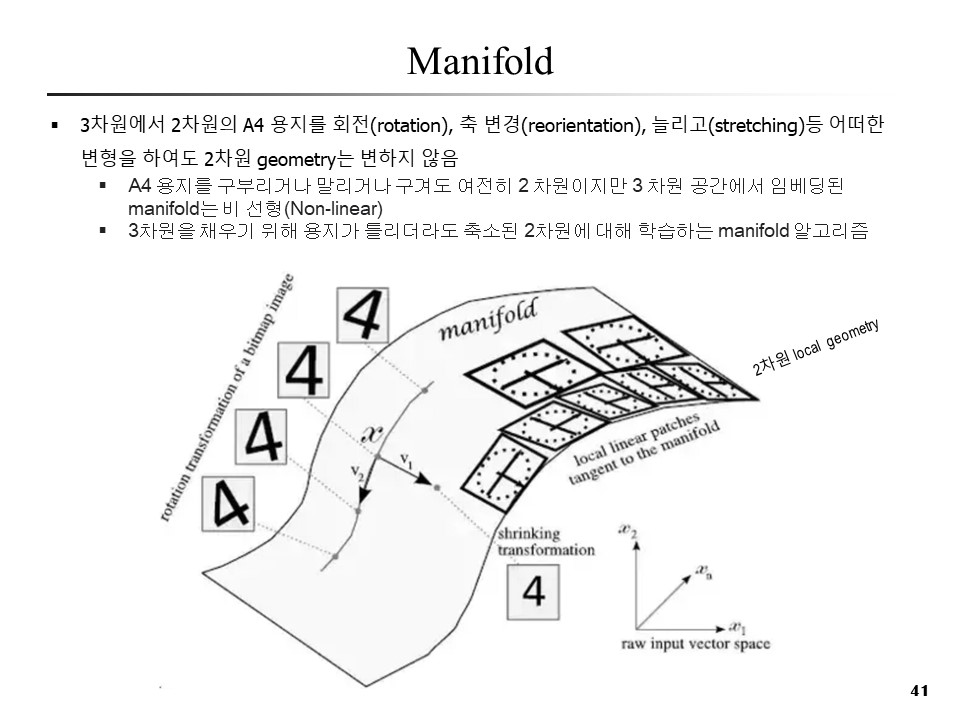

In [3]:
Image(filename='../image/pca/슬라이드41.jpg', width=width, height=height)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\NFSI291\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


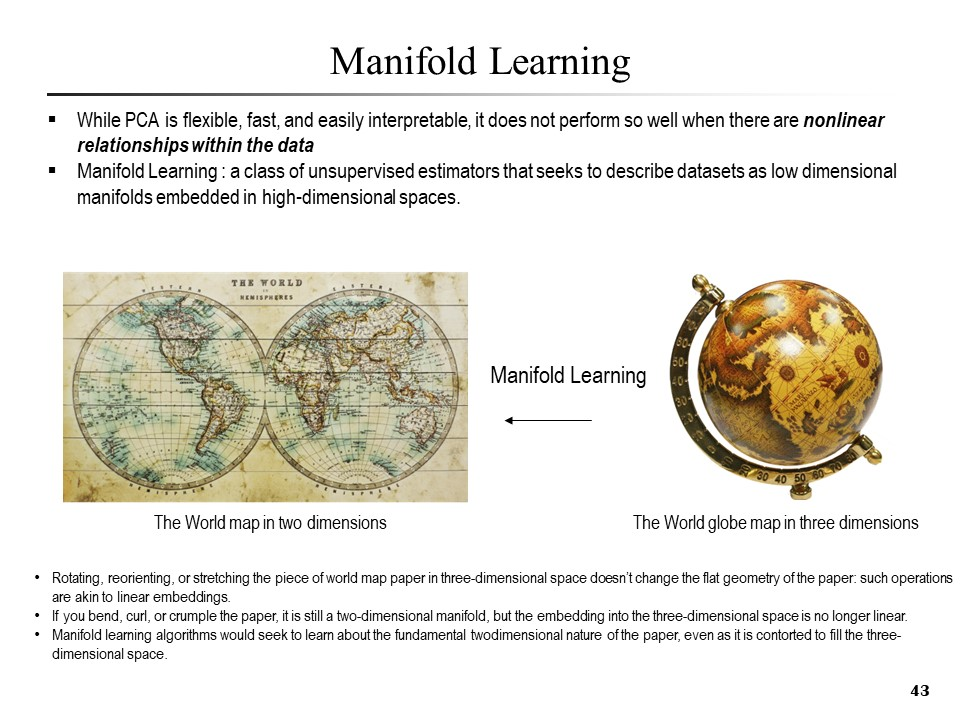

In [5]:
Image(filename='../image/pca/슬라이드43.jpg', width=width, height=height)

### Manifold Learning: "HELLO"

직관적 이해를 위해 2차원 공간에 'HELLO'를 만들어 보자

In [6]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

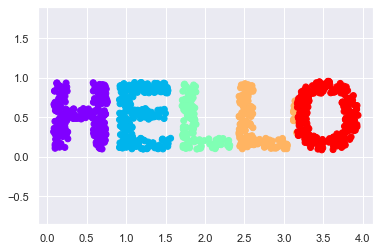

In [7]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

### Multidimensional Scaling (MDS)

- 데이터를 확장, 축소 또는 회전하여도 "HELLO'는 뚜렷함
    * 회전 행렬을 사용하여 데이터를 회전하면 x 와 y 값이 변경되지만 데이터는 여전히 근본적으로 동일

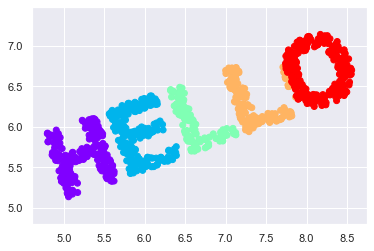

In [8]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

- 글자(patterns)를 나타내는 핵심요인은 x와 y의 좌표값이 아니라 인스턴스간의 *거리(distance)* 
- 모든 인스턴스$(i, j)$간 거리를 구해보자
    * Scikit-Learn's efficient ``pairwise_distances`` 

In [9]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

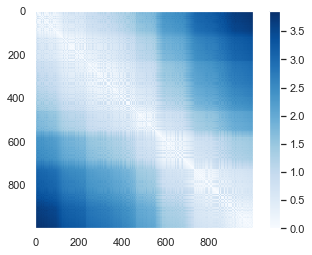

In [10]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

원래자료와 회전된 자료의 거리는 동일하다

In [11]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

- 인스턴스간 거리(pairwise distance) 표현방식은 원래자료를 회전하거나 변형하여도 동일하고
      * 시각화 그림인 'imshow()'에서도 차이점을 찾을 수 없게 되었다. 즉 원래자료로 복원은 거의 불가능해 진 것이다. 
- 그러나 MDS(multidimensional scaling) algorithm은 모든 인스턴스간 거리가 주어진다면 원래자료로 복원할 수있다.
      * `precomputed` 파라미터로 복원해보면

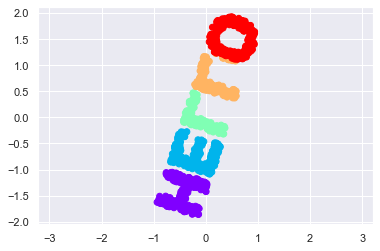

In [12]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

### MDS as Manifold Learning

- 어떤 차원에서든 모든 인스턴스간 거리를 계산할 수 있다면 2차원대신 3차원으로 투영한 원자료의 거리를계산하여 2차원에 나타내면

In [13]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

Let's visualize these points to see what we're working with:

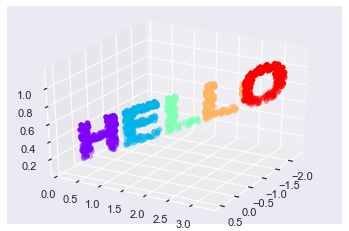

In [14]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=30, elev=30)

- 3차원의 데이터간 거리를 계산한 행렬의 최적의 2차원 임베딩을 'MDS' 알고리즘으로 만들 수 있게 되고, 원자료의 복원도 가능하다.

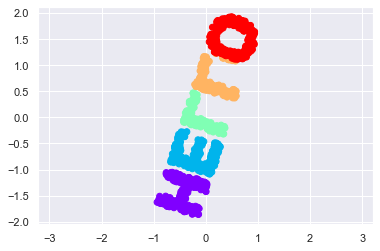

In [15]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

This is essentially the goal of a manifold learning estimator: given high-dimensional embedded data, it seeks a low-dimensional representation of the data that preserves certain relationships within the data.
In the case of MDS, the quantity preserved is the distance between every pair of points.

## 2. Nonlinear Embeddings: Where MDS Fails

선형임베딩(*linear* embeddings)이 아닌 비선형인 경우를 살펴보면

In [16]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

3차원 'HELLO' 이지만 복잡한 선형성을 가진 데이터 

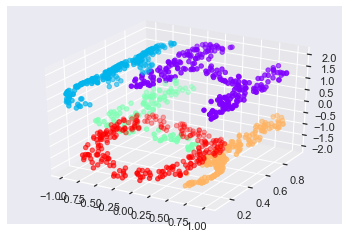

In [17]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

- 모든 데이터간 거리를 존재하나 데이터는 S자로 휘어지고 구부러진 비선형관계 pattern을 나타내고 있음
- 비선형 데이터에  MDS algorithm을 적용하면 비선형임베딩된 데이터의 관계를 하지 못하는 아래의 그림으로 표현됨

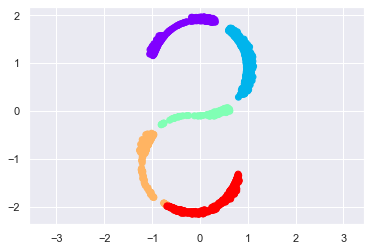

In [18]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

## 3. Nonlinear Manifolds: Locally Linear Embedding
- MDS는 모든 인스턴스의 거리를 계산하기 때문에 아주 먼 인스턴스와의 거리도 계산을 하였지만
- 모든 데이터의 근방에 있는 데이터간의 거리만 고려하면 어떻게 될까?
    * 우리가 지구라는 3차원에 살고있지만 보이는 내 주변은 2차원이니 내 주변의 거리만 생각해 보자
- 근방의 인스턴스와의 거리만 계산하는 수정된 알고리즘으로 임베딩하면 어떨까?

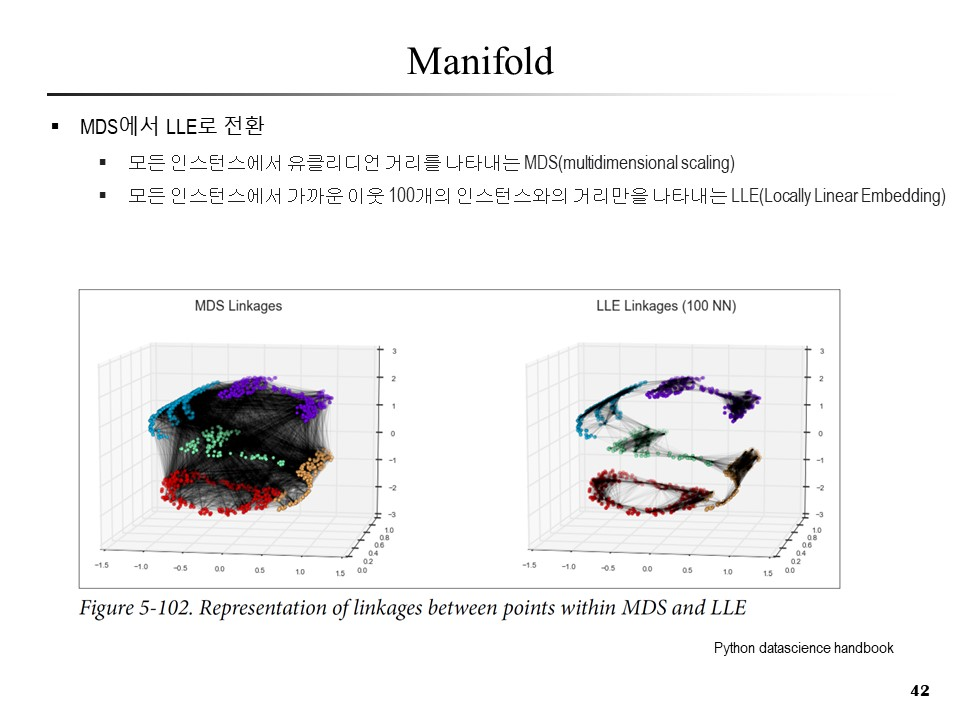

In [19]:
Image(filename='../image/pca/슬라이드42.jpg', width=width, height=height)

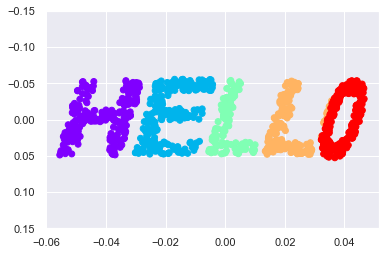

In [20]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

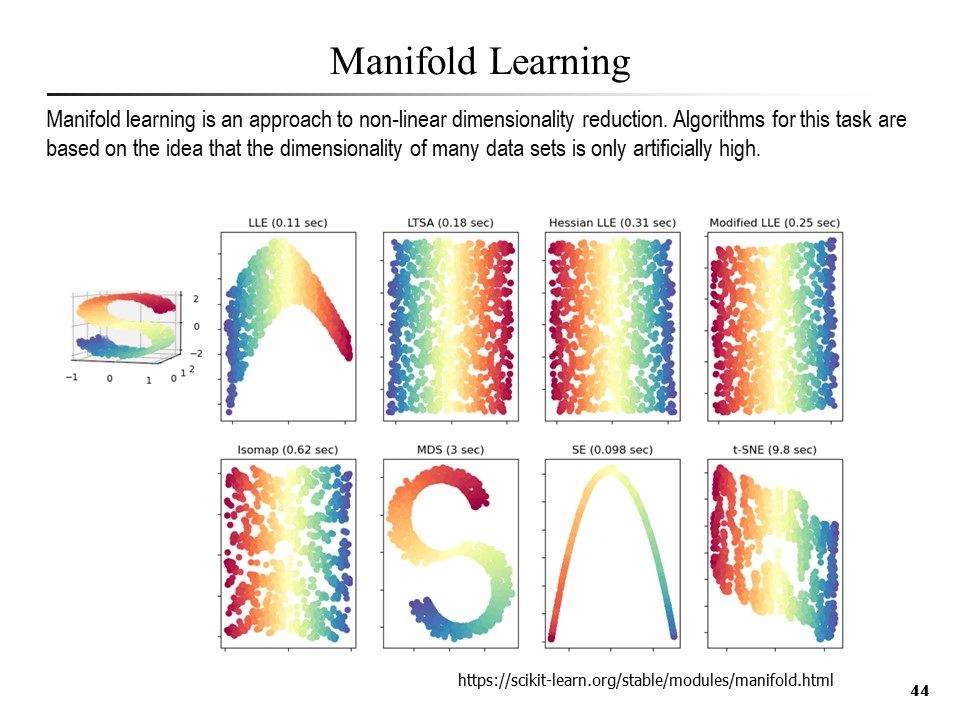

In [21]:
Image(filename='../image/pca/슬라이드44.jpg', width=width, height=height)

## Some Thoughts on Manifold Methods

Though this story and motivation is compelling, in practice manifold learning techniques tend to be finicky enough that they are rarely used for anything more than simple qualitative visualization of high-dimensional data.

The following are some of the particular challenges of manifold learning, which all contrast poorly with PCA:
- The manifold embedding result is generally highly dependent on the number of neighbors chosen, and there is generally no solid quantitative way to choose an optimal number of neighbors. In contrast, PCA does not involve such a choice.
- In manifold learning, the globally optimal number of output dimensions is difficult to determine. In contrast, PCA lets you find the output dimension based on the explained variance.
- In manifold learning, the meaning of the embedded dimensions is not always clear. In PCA, the principal components have a very clear meaning.

With all that on the table, the only clear advantage of manifold learning methods over PCA is their ability to preserve nonlinear relationships in the data; for that reason I tend to explore data with manifold methods only after first exploring them with PCA.

Scikit-Learn implements several common variants of manifold learning beyond Isomap and LLE: the Scikit-Learn documentation has a [nice discussion and comparison of them](http://scikit-learn.org/stable/modules/manifold.html).
Based on my own experience, I would give the following recommendations:

- For toy problems such as the S-curve we saw before, locally linear embedding (LLE) and its variants (especially *modified LLE*), perform very well. This is implemented in ``sklearn.manifold.LocallyLinearEmbedding``.
- For high-dimensional data from real-world sources, LLE often produces poor results, and isometric mapping (IsoMap) seems to generally lead to more meaningful embeddings. This is implemented in ``sklearn.manifold.Isomap``
- For data that is highly clustered, *t-distributed stochastic neighbor embedding* (t-SNE) seems to work very well, though can be very slow compared to other methods. This is implemented in ``sklearn.manifold.TSNE``.

## Example: Isomap on Faces

One place manifold learning is often used is in understanding the relationship between high-dimensional data points.
A common case of high-dimensional data is images: for example, a set of images with 1,000 pixels each can be thought of as a collection of points in 1,000 dimensions – the brightness of each pixel in each image defines the coordinate in that dimension.

Here let's apply Isomap on some faces data.
We will use the Labeled Faces in the Wild dataset, which we previously saw in [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb) and [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb).
Running this command will download the data and cache it in your home directory for later use:

In [22]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

We have 2,370 images, each with 2,914 pixels.
In other words, the images can be thought of as data points in a 2,914-dimensional space!

Let's quickly visualize several of these images to see what we're working with:

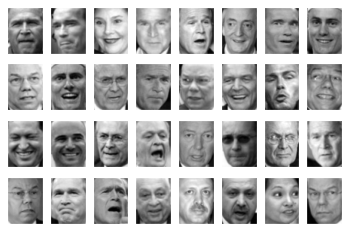

In [23]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

We would like to plot a low-dimensional embedding of the 2,914-dimensional data to learn the fundamental relationships between the images.
One useful way to start is to compute a PCA, and examine the explained variance ratio, which will give us an idea of how many linear features are required to describe the data:

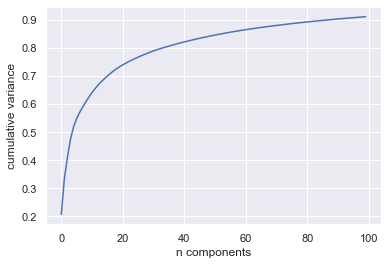

In [24]:
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

We see that for this data, nearly 100 components are required to preserve 90% of the variance: this tells us that the data is intrinsically very high dimensional—it can't be described linearly with just a few components.

When this is the case, nonlinear manifold embeddings like LLE and Isomap can be helpful.
We can compute an Isomap embedding on these faces using the same pattern shown before:

In [25]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

The output is a two-dimensional projection of all the input images.
To get a better idea of what the projection tells us, let's define a function that will output image thumbnails at the locations of the projections:

In [26]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

Calling this function now, we see the result:

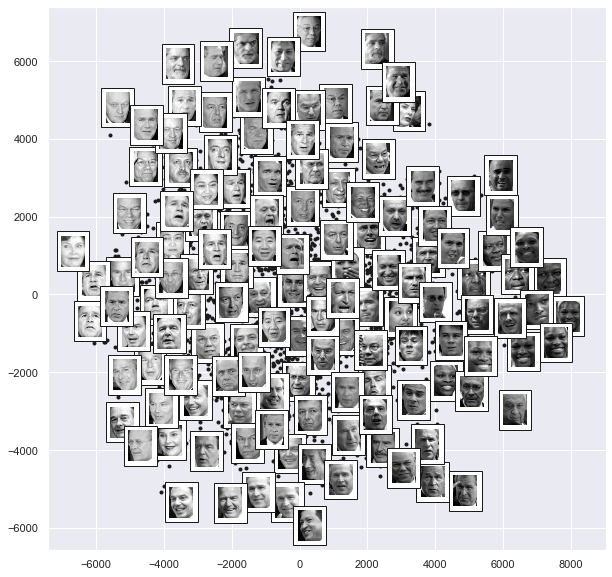

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

The result is interesting: the first two Isomap dimensions seem to describe global image features: the overall darkness or lightness of the image from left to right, and the general orientation of the face from bottom to top.
This gives us a nice visual indication of some of the fundamental features in our data.

We could then go on to classify this data (perhaps using manifold features as inputs to the classification algorithm) as we did in [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb).